This notebook includes the combined analysis on 4 telegram channels 

In [1]:
#tokenization
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk import ngrams
from collections import Counter

[nltk_data] Downloading package punkt to C:\Users\admin-
[nltk_data]     fmuma1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
import zstandard
import pathlib
import os
import ujson as json
import pandas as pd
import nltk
nltk.download('stopwords')
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import calendar

[nltk_data] Downloading package stopwords to C:\Users\admin-
[nltk_data]     fmuma1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\admin-
[nltk_data]     fmuma1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv("combined_telegram_data.csv")
df["post_datetime"] = pd.to_datetime(df['post_datetime'])
df['post_date'] = pd.to_datetime(df['post_datetime'].dt.date)

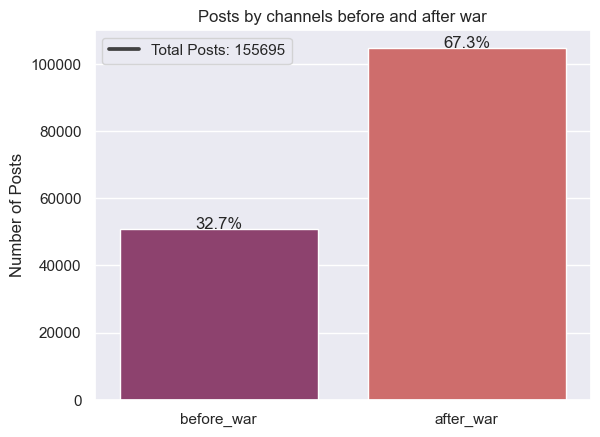

In [9]:
posts_before_war = df[(df['post_date'] < datetime(2022,2,24))].shape[0]
posts_after_war = df[(df['post_date'] >= datetime(2022,2,24))].shape[0]
data = [posts_before_war, posts_after_war]
labels = ['before_war', 'after_war']
total_data = df.shape[0]

percentage = [round(x/total_data*100, 2) for x in data]

posts_df = pd.DataFrame({'Labels': labels, 'Values': data})
sns.set(color_codes=True)
pal = sns.color_palette("flare", len(data))
rank = np.array(data).argsort().argsort()
ax = sns.barplot(x='Labels', y='Values', data=posts_df, palette=np.array(pal[::-1])[rank])

ax.legend([f'Total Posts: {total_data}'])
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

plt.title("Posts by channels before and after war")
plt.xlabel("")
plt.ylabel("Number of Posts")
plt.show()

### Information regarding number of posts

In [16]:
df['media'] = df['media'].apply(lambda x: eval(x))

In [17]:
df['images'] = df['media'].apply(lambda x: x['photos'])
df['videos'] = df['media'].apply(lambda x: x['videos'])

In [18]:
b_df = df[(df['post_date'] < datetime(2022,2,24))]
a_df = df[(df['post_date'] >= datetime(2022,2,24))]

b_only_text = b_df[(b_df["message"] != "") & (b_df["media"] == {'photos': [], 'videos': []})].shape[0]
a_only_text = a_df[(a_df["message"] != "") & (a_df["media"] == {'photos': [], 'videos': []})].shape[0]


b_only_images = b_df[(b_df["message"] == "") & (b_df['videos'].str.len() == 0) & 
                 (b_df['images'].str.len() > 0)].shape[0]
a_only_images = a_df[(a_df["message"] == "") & (a_df['videos'].str.len() == 0) & 
                 (a_df['images'].str.len() > 0)].shape[0]

b_only_videos = b_df[(b_df["message"] == "") & (b_df['videos'].str.len() > 0) & 
                 (b_df['images'].str.len() == 0)].shape[0]
a_only_videos = a_df[(a_df["message"] == "") & (a_df['videos'].str.len() > 0) & 
                 (a_df['images'].str.len() == 0)].shape[0]

b_text_video = b_df[(b_df["message"] != "") & (b_df['videos'].str.len() > 0) & 
                 (b_df['images'].str.len() == 0)].shape[0]

a_text_video = a_df[(a_df["message"] != "") & (a_df['videos'].str.len() > 0) & 
                 (a_df['images'].str.len() == 0)].shape[0]

b_text_image = b_df[(b_df["message"] != "") & (b_df['videos'].str.len() == 0) & 
                 (b_df['images'].str.len() > 0)].shape[0]
a_text_image = a_df[(a_df["message"] != "") & (a_df['videos'].str.len() == 0) & 
                 (a_df['images'].str.len() > 0)].shape[0]

b_video_image = b_df[(b_df["message"] == "") & (b_df['videos'].str.len() > 0) & 
                 (b_df['images'].str.len() > 0)].shape[0]
a_video_image = a_df[(a_df["message"] == "") & (a_df['videos'].str.len() > 0) & 
                 (a_df['images'].str.len() > 0)].shape[0]

b_text_video_image = b_df[(b_df["message"] != "") & (b_df['videos'].str.len() > 0) & 
                 (b_df['images'].str.len() > 0)].shape[0]
a_text_video_image = a_df[(a_df["message"] != "") & (a_df['videos'].str.len() > 0) & 
                 (a_df['images'].str.len() > 0)].shape[0]

# Define the values you want to plot
b_data = [b_only_text, b_only_images, b_only_videos, b_text_image, b_text_video, b_video_image, b_text_video_image]
a_data = [a_only_text, a_only_images, a_only_videos, a_text_image, a_text_video, a_video_image, a_text_video_image]

data = b_data+a_data

# Define the labels for each bar
labels = ['only_text', 'only_images', 'only_videos', 'text_image', 'text_video', 'video_image', 'text_video_image',
         'only_text', 'only_images', 'only_videos', 'text_image', 'text_video', 'video_image', 'text_video_image']

invasion = ["Before Invasion", "Before Invasion", "Before Invasion", "Before Invasion", "Before Invasion", "Before Invasion",
           "Before Invasion", "After Invasion", "After Invasion", "After Invasion", "After Invasion",
           "After Invasion", "After Invasion", "After Invasion"]

# Create a DataFrame from the values and labels
plot_df = pd.DataFrame({'Labels': labels, 'Values': data, "invasion": invasion})

In [19]:
percentage = round(plot_df['Values'] / plot_df.groupby('invasion')['Values'].transform('sum') * 100,1).tolist()

Text(0, 0.5, 'Number of Posts')

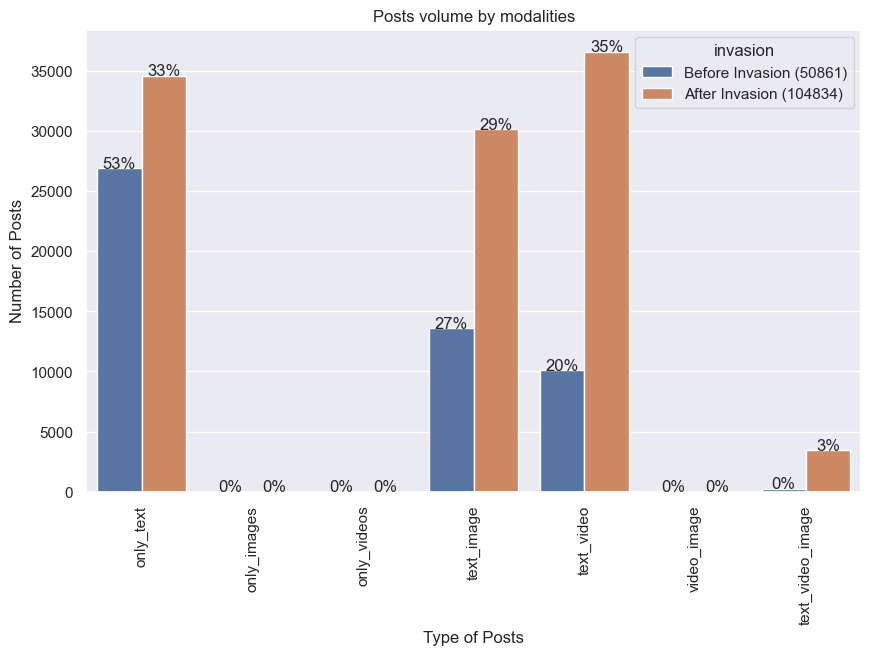

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

g = sns.barplot(x = 'Labels', y='Values', hue='invasion',data=plot_df)
plt.xticks(rotation=90);

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.0f}%'.format(percentage[i]), (x, y), ha='center')
    
new_labels = [f'Before Invasion ({b_df.shape[0]})', f'After Invasion ({a_df.shape[0]})']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    
plt.title('Posts volume by modalities')
plt.xlabel("Type of Posts")
plt.ylabel("Number of Posts")

### Number of views on posts

Total number of posts are: **155504** (excluding 191 posts that includes other forms of media) between **2020-10-16 and 2023-02-09**

In [21]:
# Avereage number of views on text only messages
text_views = b_df[(b_df["message"] != "") & (b_df['videos'].str.len() == 0) & 
                 (b_df['images'].str.len() == 0)]['post_views'].mean()

# Avereage number of views on text and images messages
text_images_views = b_df[(b_df["message"] != "") & (b_df['videos'].str.len() == 0) & 
                 (b_df['images'].str.len() > 0)]['post_views'].mean()

# Avereage number of views on text and videos messages
text_videos_views = b_df[(b_df["message"] != "") & (b_df['videos'].str.len() > 0) & 
                 (b_df['images'].str.len() == 0)]['post_views'].mean()

# Avereage number of views on all 3 
text_images_videos_views = b_df[(b_df["message"] != "") & (b_df['videos'].str.len() > 0) & 
                 (b_df['images'].str.len() > 0)]['post_views'].mean()


In [22]:
# Avereage number of views on text only messages
text_views = a_df[(a_df["message"] != "") & (a_df['videos'].str.len() == 0) & 
                 (a_df['images'].str.len() == 0)]['post_views'].mean()

# Avereage number of views on text and images messages
text_images_views = a_df[(a_df["message"] != "") & (a_df['videos'].str.len() == 0) & 
                 (a_df['images'].str.len() > 0)]['post_views'].mean()

# Avereage number of views on text and videos messages
text_videos_views = a_df[(df["message"] != "") & (a_df['videos'].str.len() > 0) & 
                 (a_df['images'].str.len() == 0)]['post_views'].mean()

# Avereage number of views on all 3 
text_images_videos_views = a_df[(a_df["message"] != "") & (a_df['videos'].str.len() > 0) & 
                 (a_df['images'].str.len() > 0)]['post_views'].mean()


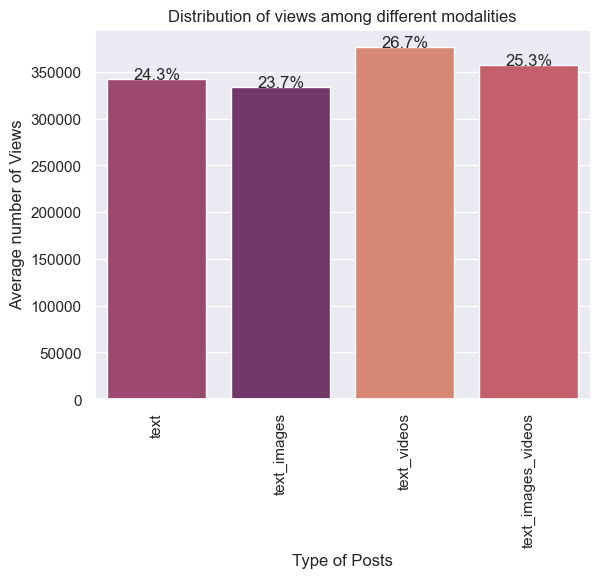

In [23]:
# Define the values you want to plot
data = [text_views, text_images_views, text_videos_views, text_images_videos_views]

# Define the labels for each bar
labels = ['text', 'text_images', 'text_videos', 'text_images_videos']

total_data = sum(data)
percentage = [round(x/total_data*100, 2) for x in data]

# Create a DataFrame from the values and labels
views_df = pd.DataFrame({'Labels': labels, 'Values': data})

# Create the bar graph using Seaborn
sns.set(color_codes=True)
pal = sns.color_palette("flare", len(data))
rank = np.array(data).argsort().argsort()
ax = sns.barplot(x='Labels', y='Values', data=views_df, palette=np.array(pal[::-1])[rank])

# Add a title to the graph
plt.title('Distribution of views among different modalities')
plt.xticks(rotation=90)
plt.xlabel("Type of Posts")
plt.ylabel("Average number of Views")


#ax.legend([f'Total Posts: {total_data}'], loc='upper right')
# ax.legend([f'Total Posts: {total_data}'], loc='upper right', bbox_to_anchor=(1.1, 0.99), borderaxespad=0)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.09
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

# Show the graph
plt.show()

### Number of reactions on a post (🔥, 😱, 👍, 🤬, ...)

In [492]:
no_reactions = df[(df['reactions'].isnull()) | (df['reactions']=={})]

print(f"Total number of posts with disabled reactions: {no_reactions.shape[0]} \
({no_reactions.shape[0]/df.shape[0]*100:.1f}%)")

Total number of posts with disabled reactions: 49130 (31.6%)


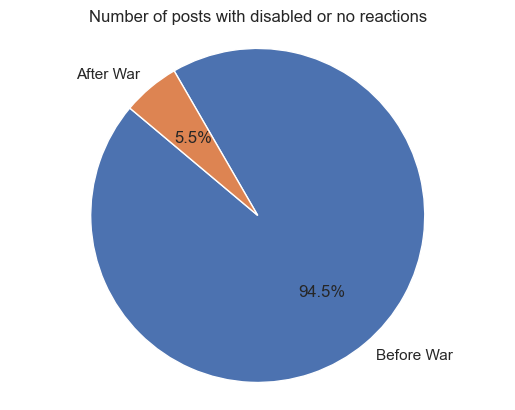

In [933]:
# Create a data frame with sample data
data = {'Label': ['Before War', 'After War'],
        'Count': [no_reactions[no_reactions['post_date'] < datetime(2022,2,24)].shape[0], 
                 no_reactions[no_reactions['post_date'] >= datetime(2022,2,24)].shape[0]]}

r_df = pd.DataFrame(data)

# Plot a pie chart using Seaborn
sns.set_style("whitegrid")
plt.pie(r_df['Count'], labels=r_df['Label'], autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
ax = plt.title("Number of posts with disabled or no reactions")

# Display the plot
plt.show()

### reactions before war

In [843]:
reac_before_war = df[(df['reactions'].notnull()) & (df['reactions']!={}) & (df['post_date'] < datetime(2022,2,24))]

reactions_before_li = reac_before_war['reactions']

total_reactions_before_war = 0
reactions_before = {}
for r in reactions_before_li:
    for k in r.keys():
        if k in reactions_before:
            reactions_before[k] += r[k]
        else:
            reactions_before[k] = r[k]
            
        total_reactions_before_war+=r[k]

In [24]:
reactions_before_sorted = dict(sorted(reactions_before.items(), key=lambda item: item[1],reverse=True))
reactions_before_sorted_li = [(k, v) for k, v in reactions_before_sorted.items()]

In [936]:
reactions_before_sorted_t = reactions_before_sorted.copy()

for keys in reactions_before_sorted_t:
    reactions_before_sorted_t[keys] = round(reactions_before_sorted_t[keys]/b_df.shape[0],5)
    
b_total_reac_per_post = sum(reactions_before_sorted_t.values())

reactions_before_sorted_t2 = reactions_before_sorted_t.copy()

for k in reactions_before_sorted_t2:
    reactions_before_sorted_t2[k] = round(reactions_before_sorted_t2[k]/b_total_reac_per_post*100, 5)

In [945]:
print([(k, v) for k, v in reactions_before_sorted_t2.items()])

[('👍', 52.64869), ('😁', 15.25101), ('💩', 8.47457), ('🔥', 6.05796), ('🤬', 3.84316), ('🤮', 2.57593), ('❤', 2.5714), ('😢', 1.58481), ('🎉', 1.53819), ('👏', 1.51294), ('👎', 1.4881), ('😱', 1.23535), ('🤔', 0.57843), ('🤩', 0.2959), ('🤯', 0.17404), ('🥰', 0.16615), ('🤡', 0.00084), ('🤣', 0.00084), ('❤\u200d🔥', 0.00063), ('🐳', 0.00021), ('🌭', 0.00021), ('🥴', 0.00021), ('🥱', 0.00021), ('🙏', 0.00021)]


In [934]:
print(f"Average number of reactions per post before war are: {total_reactions_before_war/len(reac_before_war):.0f}")

Average number of reactions per post before war are: 108


### reactions after war

In [941]:
reac_after_war = df[(df['reactions'].notnull()) & (df['reactions']!={}) & (df['post_date'] >= datetime(2022,2,24))]

reactions_after_li = reac_after_war['reactions']

total_reactions_after_war = 0
reactions_after = {}
for r in reactions_after_li:
    for k in r.keys():
        if k in reactions_after:
            reactions_after[k] += r[k]
        else:
            reactions_after[k] = r[k]
            
        total_reactions_after_war+=r[k]
        
print(f"Average number of reactions per post before war are: {total_reactions_after_war/len(reac_after_war):.0f}")

Average number of reactions per post before war are: 8209


In [26]:
reactions_after_sorted = dict(sorted(reactions_after.items(), key=lambda item: item[1],reverse=True))
reactions_after_sorted_li = [(k, v) for k, v in reactions_after_sorted.items()]

In [943]:
reactions_after_sorted_t = reactions_after_sorted.copy()

for keys in reactions_after_sorted_t:
    reactions_after_sorted_t[keys] = round(reactions_after_sorted_t[keys]/a_df.shape[0],5)
    
a_total_reac_per_post = sum(reactions_after_sorted_t.values())

reactions_after_sorted_t2 = reactions_after_sorted_t.copy()

for k in reactions_after_sorted_t2:
    reactions_after_sorted_t2[k] = round(reactions_after_sorted_t2[k]/a_total_reac_per_post*100, 5)

In [946]:
print([(k, v) for k, v in reactions_after_sorted_t2.items()])

[('👍', 63.83483), ('🔥', 6.58564), ('👎', 6.09835), ('❤', 4.55011), ('😁', 4.06863), ('🤬', 3.63872), ('😢', 3.61513), ('👏', 3.03272), ('🤔', 2.18305), ('😱', 0.58792), ('🙏', 0.48849), ('🤣', 0.36069), ('💩', 0.27901), ('🤮', 0.13558), ('❤\u200d🔥', 0.12179), ('🤡', 0.09982), ('🎉', 0.08041), ('⚡', 0.05786), ('🤯', 0.04234), ('🥱', 0.02673), ('🥰', 0.02262), ('💯', 0.01971), ('🥴', 0.0138), ('🌚', 0.01218), ('🤩', 0.00761), ('🏆', 0.00678), ('🌭', 0.00644), ('👌', 0.00595), ('😐', 0.00396), ('💔', 0.00393), ('🐳', 0.00384), ('🕊', 0.00304), ('😍', 0.00234)]


**Average number of reactions increased from 108 to 8209 (increase by 7500%) per post before and after war**